# Breast Cancer Diagnosis - EDA and ML

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [306]:
df = pd.DataFrame(pd.read_csv('breast_cancer_data.csv', index_col='id'))
print(df.dtypes)
df.head()

diagnosis                   object
Radius_mean                float64
Texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
# check for missing data

df.isnull().any()

# there is no missing data

diagnosis                  False
Radius_mean                False
Texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [47]:
# check for duplicated columns

df[df.duplicated()]


,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,


## Exploratory data analysis

/var/folders/v2/r3k7_w8s5tvg30ngz0fdcc440000gn/T/ipykernel_1308/2067718268.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

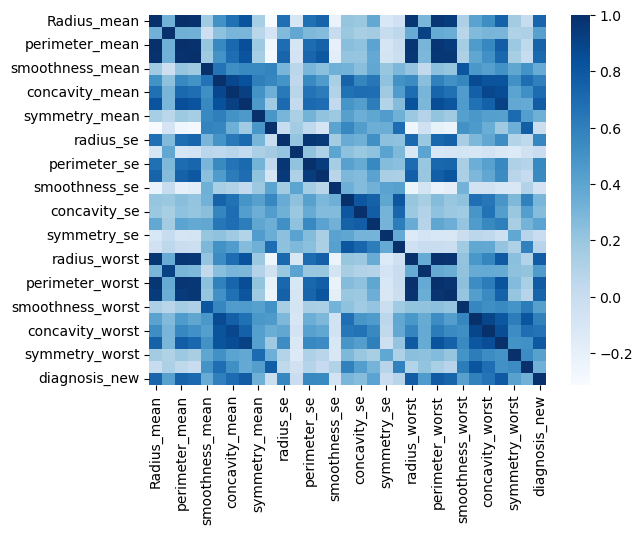

In [174]:
# check for correlation

sns.heatmap(df.corr(), cmap='Blues')

in general, measurements of tumour feasures are highly correlated with scores of tumour features

In [49]:
df['diagnosis'].unique()

# diagnosis is categorized as malignant or begnin

array(['M', 'B'], dtype=object)

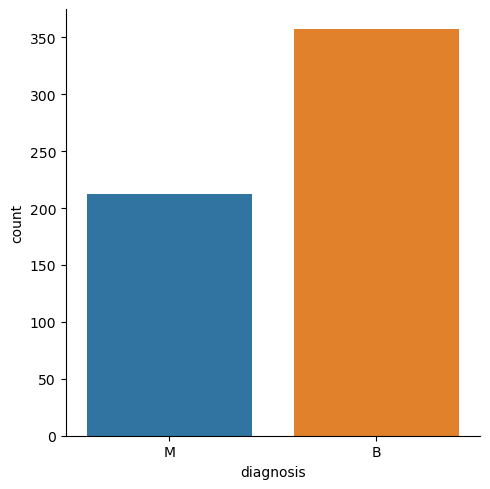

In [50]:
sns.catplot(data = df, x='diagnosis', kind='count')


# there are more begnin cases than malignant cases in this dataset, 
#this may be a problem to fitting a model and generating effective predictions later on.
#consider over-sampling or down-sampling the dataset...

In [51]:
from sklearn.linear_model import LinearRegression

# x and y
x= df['radius_worst'].values.reshape(-1,1)
y=df['Radius_mean'].values.reshape(-1,1)

#fit model
lreg = LinearRegression()
lreg_model = lreg.fit(x,y)
print( f'R2 : {lreg_model.score(x,y)}')

R2 : 0.9400058194119933


In [52]:
# find coefficient and intercept of the fitted equation
print(f'coefficient is : {lreg_model.coef_[0][0]}')
print(f'intercet is: {lreg_model.intercept_[0]}')

coefficient is : 0.7069174220887198
intercet is: 2.626318022285389


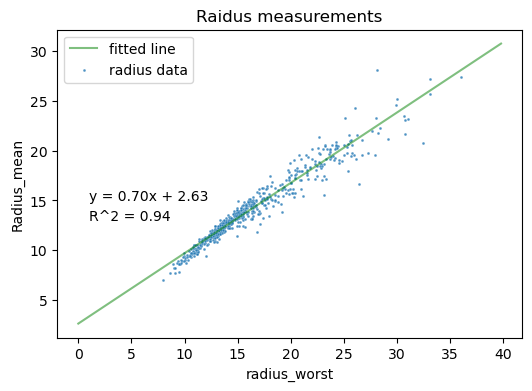

In [166]:
#plot fitted line and data
rand = np.arange(0,40,0.2)
Y = (rand*lreg_model.coef_[0][0]+lreg_model.intercept_[0]).ravel()


plt.figure(figsize=(6,4))

sns.lineplot(x=rand, y=Y, color = 'green', alpha=0.5, label='fitted line')
sns.scatterplot(data=df, x='radius_worst', y='Radius_mean', s=4, alpha=0.8, label='radius data')

plt.title('Raidus measurements')
plt.legend()
plt.text(1,15,s='y = 0.70x + 2.63')
plt.text(1,13,s='R^2 = 0.94')
plt.show()



In [167]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# make subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=("Radius mean vs. cancer diagnosis", 
                                                   "Perimeter mean vs. cancer diagnosis",
                                                   "Area mean vs. diagnosis",
                                                   "Compactness vs. diagnosis"
                                                  ))


# create plots
fig.add_trace(go.Scatter(x=df["diagnosis"].values, y=df["Radius_mean"].values, mode='markers'),
              row=1,
              col=1)
fig.add_trace(go.Scatter(x=df["diagnosis"].values, y=df["perimeter_mean"].values, mode='markers'),
              row=1,
              col=2)
fig.add_trace(go.Scatter(x=df["diagnosis"].values, y=df["area_mean"].values, mode='markers'),
              row=2,
              col=1)
fig.add_trace(go.Scatter(x=df["diagnosis"].values, y=df["compactness_mean"].values, mode='markers'),
              row=2,
              col=2)

#modify plot background and size
fig.update_layout(template='simple_white',  width=900, height=500,)

#create plot titels, x and y labels
fig.update_xaxes(title_text="Diagnosis", row=1, col=1)
fig.update_xaxes(title_text="Diagnosis", row=1, col=2)
fig.update_xaxes(title_text="Diagnosis", row=2, col=1)
fig.update_xaxes(title_text="Diagnosis", row=2, col=2)

fig.update_yaxes(title_text="Radius Mean", row=1, col=1)
fig.update_yaxes(title_text="Perimeter Mean", row=1, col=2)
fig.update_yaxes(title_text="Area Mean", row=2, col=1)
fig.update_yaxes(title_text="Compactness Mean", row=2, col=2)

#show plot
fig.show()

## Machine Learning - predicting diagnosis as a binary outcome

In [182]:
from collections import Counter


X = df.drop(columns=['diagnosis','diagnosis_new'])
y = df['diagnosis']

print(Counter(y))

# the data is imbalanced between the binary outcomes. This may result in poorly fitted model and more type 2 errors

Counter({'B': 357, 'M': 212})


In [183]:
# using SMOTE to oversample minority data
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=10)
X,y = oversample.fit_resample(X,y)

Counter(y)


Counter({'M': 357, 'B': 357})

In [184]:
from sklearn.model_selection import train_test_split

# split data to test train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)

# ensure that binary outcomes are relatively even train dataset
print(f'Train data :{Counter(y_train)}')
print(f'Test data :{Counter(y_test)}')


Train data :Counter({'B': 274, 'M': 261})
Test data :Counter({'M': 96, 'B': 83})


### Decision Tree Model

DecisionTree model score: 0.9497206703910615


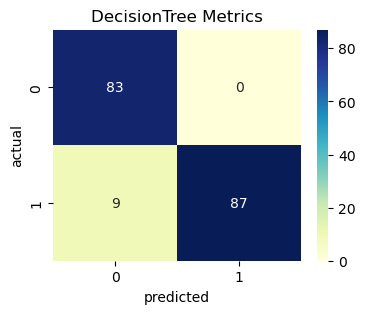

<function matplotlib.pyplot.show(close=None, block=None)>

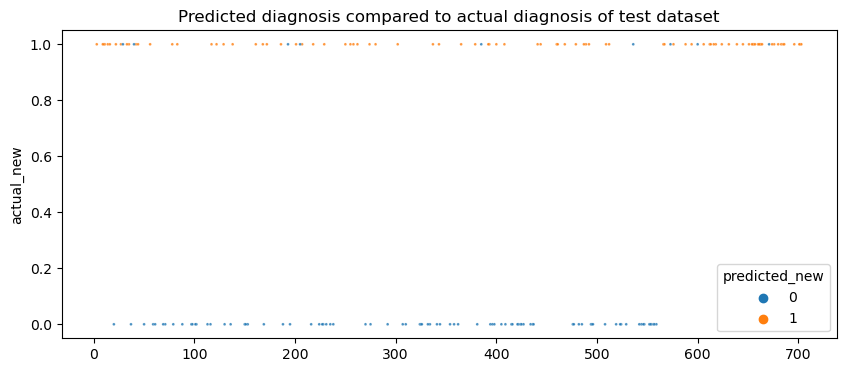

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# establish decision tree model
dtclf = DecisionTreeClassifier(max_depth=4, min_samples_split=2, random_state=1)
dt_model = dtclf.fit(X_train, y_train)
print(f'DecisionTree model score: {dt_model.score(X_test, y_test)}')

#score model
dt_model.score(X_test, y_test)

#evaluate model using confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_model.predict(X_test)),annot=True,cmap='YlGnBu')
plt.title('DecisionTree Metrics')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#plot model predictions compared to actual
dtdf = pd.DataFrame({'predicted':dt_model.predict(X_test),
             'actual': y_test})

dtdf['predicted_new'] = np.where(dtdf['predicted']=='M',1,0)
dtdf['actual_new'] = np.where(dtdf['actual']=='M',1,0)

plt.figure(figsize=(10,4))
sns.scatterplot(data=dtdf,x=dtdf.index, y='actual_new',hue='predicted_new', s=4, alpha=0.8)
plt.title('Predicted diagnosis compared to actual diagnosis of test dataset')
plt.show

### Random Forest Model

RandomForest model score: 0.9608938547486033


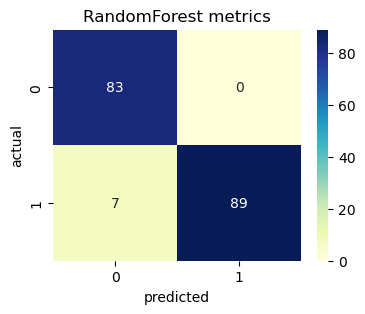

<function matplotlib.pyplot.show(close=None, block=None)>

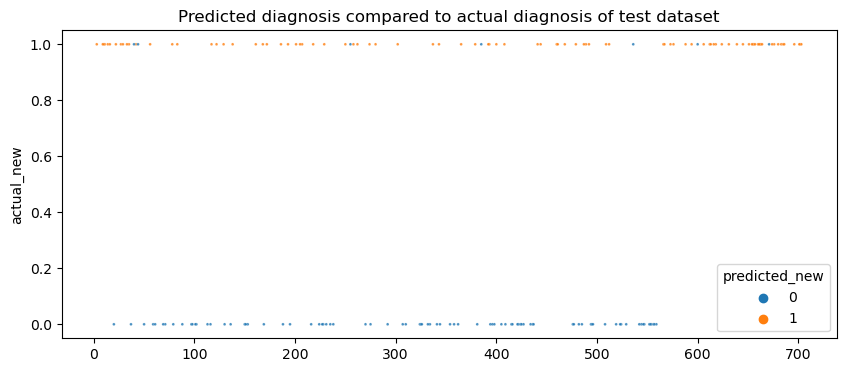

In [190]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=15, max_depth=4, min_samples_split=2, random_state=1)
rf_model = rfclf.fit(X_train, y_train)
print(f'RandomForest model score: {rf_model.score(X_test, y_test)}')

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_model.predict(X_test)), annot=True,cmap='YlGnBu')
plt.title('RandomForest metrics')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#plot model predictions compared to actual
rfdf = pd.DataFrame({'predicted':rf_model.predict(X_test),
             'actual': y_test})

rfdf['predicted_new'] = np.where(rfdf['predicted']=='M',1,0)
rfdf['actual_new'] = np.where(rfdf['actual']=='M',1,0)

plt.figure(figsize=(10,4))
sns.scatterplot(data=rfdf,x=rfdf.index, y='actual_new',hue='predicted_new', s=4, alpha=0.8)
plt.title('Predicted diagnosis compared to actual diagnosis of test dataset')
plt.show


### SVM

svc model score: 0.9553072625698324


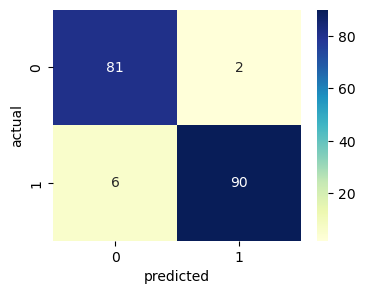

<function matplotlib.pyplot.show(close=None, block=None)>

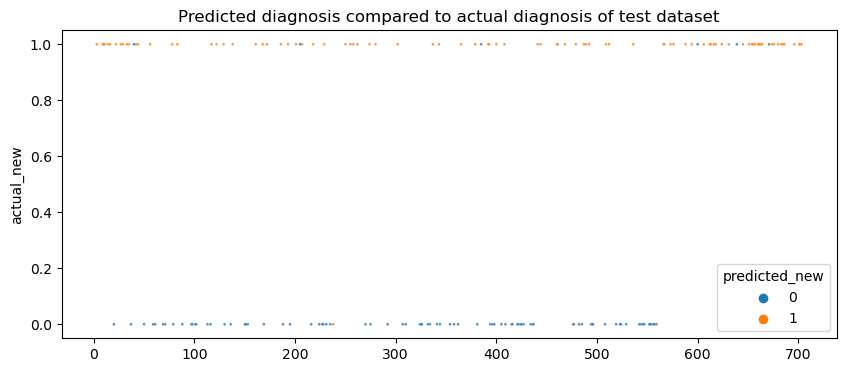

In [296]:
from sklearn.svm import SVC

svcclf = SVC(kernel='linear')
svc_model = svcclf.fit(X_train, y_train)
print(f'svc model score: {svc_model.score(X_test, y_test)}')

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_model.predict(X_test)), annot=True, cmap='YlGnBu')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#plot model predictions compared to actual
svcdf = pd.DataFrame({'predicted':svc_model.predict(X_test),
             'actual': y_test})

svcdf['predicted_new'] = np.where(svcdf['predicted']=='M',1,0)
svcdf['actual_new'] = np.where(svcdf['actual']=='M',1,0)

plt.figure(figsize=(10,4))
sns.scatterplot(data=svcdf,x=svcdf.index, y='actual_new',hue='predicted_new', s=4, alpha=0.8)
plt.title('Predicted diagnosis compared to actual diagnosis of test dataset')
plt.show



### Evaluate models using k-fold cross validation

In [301]:
# Decision tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model_dt = DecisionTreeClassifier(max_depth=2, min_samples_split=2, random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

dt_scores = cross_val_score(model_dt, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(dt_scores))
print('All ROC AUC:',dt_scores)

Mean ROC AUC: 0.948
All ROC AUC: [0.9430727  0.99038462 0.92307692 0.93406593 0.93406593 0.91737892
 0.94159544 0.93732194 0.96153846 0.98076923 0.92112483 0.97664835
 0.97802198 0.96222527 0.96153846 0.94230769 0.92948718 0.95512821
 0.92307692 0.93019943 0.90603567 0.98076923 0.96222527 0.95604396
 0.97664835 0.94373219 0.99928775 0.93518519 0.93518519 0.8960114 ]


In [302]:
# Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model_rf = RandomForestClassifier(n_estimators=15, max_depth=3, min_samples_split=2, random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

rf_scores = cross_val_score(model_rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(rf_scores))
print('All ROC AUC:',rf_scores)

Mean ROC AUC: 0.987
All ROC AUC: [0.99314129 1.         0.98214286 0.9635989  0.98351648 1.
 0.98076923 0.99430199 1.         1.         0.96570645 1.
 0.99587912 0.99725275 0.99725275 0.98219373 0.98717949 0.98575499
 0.98005698 0.96866097 0.97942387 0.99862637 0.99725275 0.95947802
 0.99450549 0.98219373 1.         0.9985755  0.96296296 0.96937322]


In [304]:
# SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model_svc = SVC(kernel='linear')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

svc_scores = cross_val_score(model_svc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(svc_scores))
print('All ROC AUC:', svc_scores)

Mean ROC AUC: 0.993
All ROC AUC: [0.97668038 1.         0.99313187 0.99450549 0.99725275 0.9985755
 0.97720798 0.99002849 0.9985755  1.         0.97942387 1.
 0.99450549 0.99038462 0.99862637 0.9957265  1.         1.
 0.98433048 0.99430199 0.98902606 0.98626374 1.         1.
 0.99725275 0.98717949 1.         0.98860399 0.98290598 0.98148148]
